# <span style="color:#0b486b">SIT 720 - Machine Learning</span>
## Assignment 1

## Student ID : 217503382
## Name:Manidhar Reddy Juturu
---


### Part-1 (Understanding the Data):



1.What is the objective of the data collection process?

Ans. The main objective of the data collection process is to train the SVM model.Hence we can the predict the untrained data using the trained model. 

2.What human activity types does this dataset have? How many subjects/people have performed these activities?

Ans.The six selected Activities of Daily Living (ADL) were standing, sitting, laying down, walking, walking downstairs and upstairs.A group of 30 volunteers with ages ranging from 19 to 48 years have performed these activities.

3.How many instances are available in the training and test sets? How many features are used to represent each instance? Summarize the type of features extracted in 2-3 sentences. 

Ans.Instances for trainig data is 7352. 

-->Instances for testing data is 2947. 

-->561 features are used to represent each instance.


-->They collected triaxial linear acceleration and angular velocity signals using the phone accelerometer and gyroscope at a sampling rate of 50Hz. These signals were pre- processed for noise reduction with a median filter and a 3rd order low-pass Butteworth filter with a 20 Hz cutoff frequency. This rate is sufficient for capturing human body motion since 99% of its energy is contained below 15Hz

4.Describe briefly what machine learning model is used in this paper for activity recognition and how is it trained. How much is the maximum accuracy achieved?

Ans.Multiclass Support Vector Machine(SVM) approach machine learning model is used in this paper for activity recognition.Well-known and state-of-the-art Support Vector Machine (SVM) binary classifiers, which are generalized to the multiclass case through a One-Vs-All (OVA) approach: the SVM hyperparameters are selected through a 10-fold Cross Validation procedure and Gaussian kernels are used for this experiment.

The dataset has been randomly partitioned into two independent sets, where 70% of the data were selected for training and the remaining 30% of the data for testing. Maximum accuracy achieved is 96%.  

### Part-2 K-Nearest Neighbour Classification:


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from io import StringIO
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import *
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
from sklearn import svm

/Applications/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '
/Applications/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
#Reading the train data and test data 
x_train=np.genfromtxt("X_train.txt")
y_train=np.genfromtxt("y_train.txt")
x_test=np.genfromtxt("X_test.txt")
y_test=np.genfromtxt("y_test.txt")
print x_train.shape
print y_train.shape
print x_test.shape
print y_test.shape

(7352, 561)
(7352,)
(2947, 561)
(2947,)


In [6]:
#choosing the best K value from K values from 1 to 50 using 10-fold cross-validation
f1_score=[]
accuracy=[]
i=1
for num in range(50):
    KNN_classfication= KNeighborsClassifier(n_neighbors=i)
    KNN_classfication.fit(x_train,y_train)
    f1_score.append(np.mean(cross_val_score(KNN_classfication,x_train,y_train,cv=10,scoring='f1_micro')))
    accuracy.append(np.mean(cross_val_score(KNN_classfication,x_train,y_train,cv=10,scoring='accuracy')))
    i=i+1
maximum_f1=np.argmax(f1_score)+1
print "Best value of K is:",maximum_f1

Best value of K is: 10


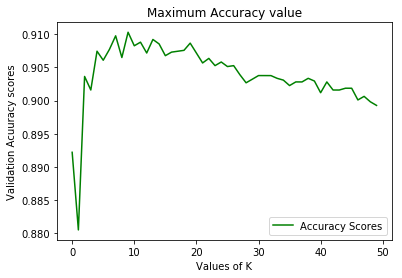

In [7]:
#i/p values-alpha
K_value=range(0,len(accuracy))
plt.plot(K_value,accuracy,color='g',label='Accuracy Scores')
#Plotting the best hyper-parameter
plt.xlabel('Values of K')
plt.ylabel('Validation Acuuracy scores')
plt.title('Maximum Accuracy value')
plt.legend(loc="lower right")

In [10]:
#Finding the multi-class averaged F1-score and accuracy,confusion matrix.
KNN_classfication= KNeighborsClassifier(n_neighbors=maximum_f1)
KNN_classfication.fit(x_train,y_train)
conf_matrix=confusion_matrix(y_test,KNN_classfication.predict(x_test))
FP = conf_matrix.sum(axis=0)-np.diag(conf_matrix)  
FN = conf_matrix.sum(axis=1)-np.diag(conf_matrix)
TP = np.diag(conf_matrix)
TN = conf_matrix.sum() - (FP + FN + TP)
i=0
#accuracy
accuracy=[]
#Precision
precison=[]
#re-call
recall=[]
f1_score=[]
for num in range(6):
    accuracy.append(float(TP[i]+TN[i])/float(TP[i]+FP[i]+FN[i]+TN[i])*100)
    precison.append(float(TP[i])/float(TP[i]+FP[i]))
    recall.append(float(TP[i])/float(TP[i]+FN[i]))
    f1_score.append(2*((precison[i]*recall[i])/(precison[i]+recall[i])))
    i+=1
print "Multi class averaged F1-score:",np.mean(f1_score)
print "Multi class averaged Accuracy is:",np.mean(accuracy)
print "Confusion matrix:\n",conf_matrix

Multi class averaged F1-score: 0.903807934961
Multi class averaged Accuracy is: 96.8894921389
Confusion matrix:
[[486   0  10   0   0   0]
 [ 36 431   4   0   0   0]
 [ 51  41 328   0   0   0]
 [  0   4   0 409  78   0]
 [  0   0   0  47 485   0]
 [  0   0   0   2   2 533]]


## Part-3 Multi class logistic regression with Elastic Net

In [11]:
#Choosing the best values of alpha and l1-ratio using 10-fold cross-validation, based on model F1-score.
alpha_values=[1e-4,3e-4,1e-3,3e-3,1e-2,3e-2]
l1_Ratio=[0,0.15,0.5,0.7,1]
f1_score=[]
alpha_l1_index=np.zeros((6,5),dtype=object)
i=0
j=0
for i in range(0,6):
    j=0
    for j in range(0,5):
        elastic_net=SGDClassifier(loss='log',penalty='elasticnet',alpha=alpha_values[i],l1_ratio=l1_Ratio[j]).fit(x_train,y_train)
        alpha_l1_index[i,j]=np.matrix([alpha_values[i],l1_Ratio[j]])
        f1_score.append(np.mean(cross_val_score(elastic_net,x_train,y_train,cv=10,scoring='f1_micro')))
        j+=1
    i+=1
#print f1_score
#print alpha_l1_index

index= np.argmax(f1_score)
alpha_maximum=(alpha_l1_index[index/5][index%5])[0,0]
l1_maximum=(alpha_l1_index[index/5][index%5])[0,1]
print "Best alpha value is: ",alpha_maximum
print "Best l1 Ratio is: ",l1_maximum


Best alpha value is:  0.001
Best l1 Ratio is:  0.5


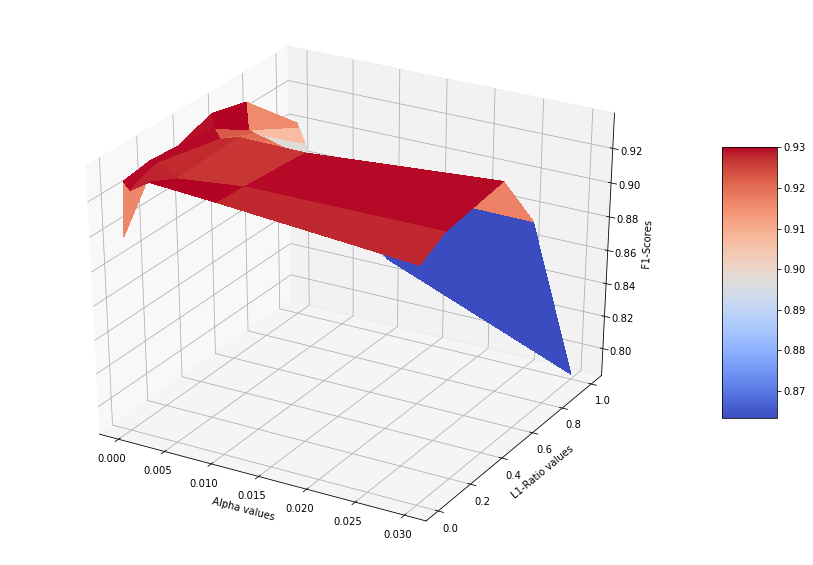

In [12]:
# surface plot of F1-score with respect to alpha and l1-ratio values
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
x=np.array(alpha_values)
y=np.array(l1_Ratio)
x,y=np.meshgrid(x,y)
z= np.array(f1_score).reshape(5,6)
plot= ax.plot_surface(x,y,z,linewidth=0.5, antialiased=False,cmap=cm.coolwarm)
fig.colorbar(plot, shrink=0.5, aspect=5)
fig.set_size_inches(15, 10, forward=True)
ax.set_xlabel('Alpha values')
ax.set_ylabel('L1-Ratio values')
ax.set_zlabel('F1-Scores')
plt.show()

In [14]:
#Finding the confusion matrix, multi-class averaged F1-score and accuracy.
elastic_net=SGDClassifier(loss='log',penalty='elasticnet',alpha=alpha_maximum,l1_ratio=l1_maximum).fit(x_train,y_train)
conf_matrix=confusion_matrix(y_test,elastic_net.predict(x_test))

FP = conf_matrix.sum(axis=0)-np.diag(conf_matrix)  
FN = conf_matrix.sum(axis=1)-np.diag(conf_matrix)
TP = np.diag(conf_matrix)
TN = conf_matrix.sum() - (FP + FN + TP)
i=0
#Accuracy
accuracy=[]
#Precision
precision=[]
#re-call
recall=[]
f1_score=[]
for num in range(6):
    accuracy.append(float(TP[i]+TN[i])/float(TP[i]+FP[i]+FN[i]+TN[i])*100)
    precision.append(float(TP[i])/float(TP[i]+FP[i]))
    recall.append(float(TP[i])/float(TP[i]+FN[i]))
    f1_score.append(2*((precision[i]*recall[i])/(precision[i]+recall[i])))
    i+=1
print "Multi class averaged f1 score:",np.mean(f1_score)
print "Multi class averaged Accuracy is:",np.mean(accuracy)
print "Confusion matrix:\n",conf_matrix

Multi class averaged f1 score: 0.946600451274
Multi class averaged Accuracy is: 98.2468046601
Confusion matrix:
[[492   2   2   0   0   0]
 [ 45 408  16   2   0   0]
 [  7   6 407   0   0   0]
 [  2   3   1 447  38   0]
 [  3   0   1  27 501   0]
 [  0   0   0   0   0 537]]


# Part-4:  Support Vector Machine (RBF Kernel)

In [15]:
#Finding the best values of gamma and C using 10-fold cross-validation, based on model F1-score.

gamma_values=[1e-3,1e-4]
C_values=[1,10,100,1000]
f1_score=[]
gamma_C_index=np.zeros((2,4),dtype=object)
i=0
j=0

for i in range(0,2):
    j=0
    for j in range(0,4):
        svc_model = svm.SVC(kernel='rbf', gamma=gamma_values[i], C=C_values[j])
        svc_model.fit(x_train,y_train)
        gamma_C_index[i,j]=np.matrix([gamma_values[i],C_values[j]])
        f1_score.append(np.mean(cross_val_score(svc_model,x_train,y_train,cv=10,scoring='f1_micro')))
        j+=1
    i+=1
#print f1_score
#print gamma_C_index

index= np.argmax(f1_score)
gamma_maximum=(gamma_C_index[index/4][index%4])[0,0]
C_maximum=(gamma_C_index[index/4][index%4])[0,1]
print "Best gamma value is:",gamma_maximum
print "Best C value is:",C_maximum

x=np.array(gamma_values)
y=np.array(C_values)
x,y=np.meshgrid(x,y)
#print np.array(f1_score)
x=np.array(gamma_values).ravel()
y=np.array(C_values).ravel()
x,y=np.meshgrid(x,y)
#print x.shape
z=np.array(f1_score).reshape(4,2)
#print z

Best gamma value is: 0.001
Best C value is: 1000.0


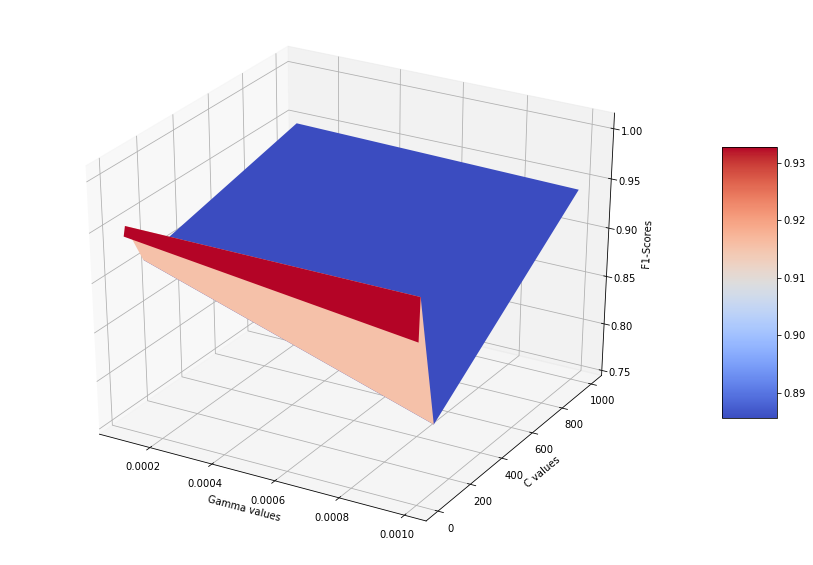

In [16]:
# surface plot of F1-score with respect to gamma and C.
fig = plt.figure()
ax = fig.gca(projection='3d')
x=np.array(gamma_values).ravel()
y=np.array(C_values).ravel()
x,y=np.meshgrid(x,y)
z=np.array(f1_score).reshape(4,2)
plot= ax.plot_surface(x,y,z,linewidth=0.5, cmap=cm.coolwarm)
ax.set_zlim(0.75, 1.01)
fig.colorbar(plot, shrink=0.5, aspect=5)
fig.set_size_inches(15, 10, forward=True)
ax.set_xlabel('Gamma values')
ax.set_ylabel('C values')
ax.set_zlabel('F1-Scores')
plt.show()

In [17]:
# Finding the confusion matrix, multi-class averaged F1-score and accuracy.
conf_matrix=confusion_matrix(y_test,svc_model.predict(x_test))

FP = conf_matrix.sum(axis=0)-np.diag(conf_matrix)  
FN = conf_matrix.sum(axis=1)-np.diag(conf_matrix)
TP = np.diag(conf_matrix)
TN = conf_matrix.sum() - (FP + FN + TP)
i=0
accuracy=[]
precision=[]
recall=[]
f1_score=[]
for num in range(6):
    accuracy.append(float(TP[i]+TN[i])/float(TP[i]+FP[i]+FN[i]+TN[i])*100)
    precision.append(float(TP[i])/float(TP[i]+FP[i]))
    recall.append(float(TP[i])/float(TP[i]+FN[i]))
    f1_score.append(2*((precision[i]*recall[i])/(precision[i]+recall[i])))
    i+=1
print "Multi class averaged f1 score:",np.mean(f1_score)
print "Multi class averaged Accuracy is:",np.mean(accuracy)
print "Confusion matrix:\n",conf_matrix

Multi class averaged f1 score: 0.96205322377
Multi class averaged Accuracy is: 98.7331749802
Confusion matrix:
[[492   1   3   0   0   0]
 [ 24 447   0   0   0   0]
 [  5   9 406   0   0   0]
 [  0   2   0 436  53   0]
 [  0   0   0  15 517   0]
 [  0   0   0   0   0 537]]


# Part-5 Random Forest

In [19]:
# Finding the best values of tree-depth and number of trees using 10-fold cross-validation, based on model F1-score.

from sklearn.ensemble import RandomForestClassifier

tree_depth=[300,500,600]
no_of_trees=[200,500,700]
f1_score=[]
tree_index=np.zeros((3,3),dtype=object)
i=0
j=0

for i in range(3):
    j=0
    for j in range(3):
        rfclf = RandomForestClassifier(n_estimators=no_of_trees[j], max_depth=tree_depth[i], random_state=42)
        rfclf.fit(x_train,y_train)
        tree_index[i,j]=np.matrix([tree_depth[i],no_of_trees[j]])
        f1_score.append(np.mean(cross_val_score(rfclf,x_train,y_train,cv=10,scoring='f1_micro')))
        j+=1
    i+=1
#print f1_score
#print tree_index 



In [23]:
index= np.argmax(f1_score)
tree_depth_maximum=(tree_index[index/3][index%3])[0,0]
num_tree_maximum=(tree_index[index/3][index%3])[0,1]
print "Best vale of tree depth is:",tree_depth_maximum
print "Best number of trees is:", num_tree_maximum

 Best vale of tree depth is: 300
Best number of trees is: 700


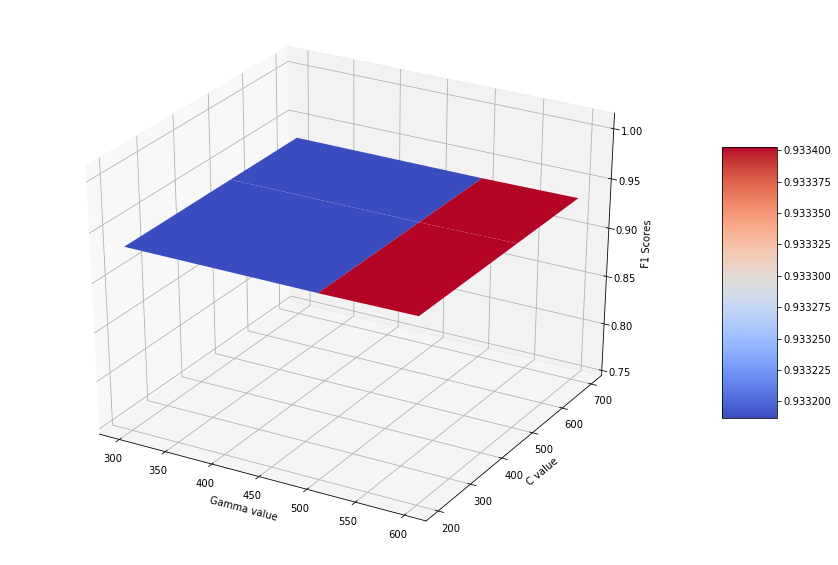

In [25]:
# surface plot of F1-score with respect to tree-depth and number of trees.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
x=np.array(tree_depth)
y=np.array(no_of_trees)
x,y=np.meshgrid(x,y)
z=np.array(f1_score).reshape(3,3)
plot= ax.plot_surface(x,y,z,linewidth=0.5, cmap=cm.coolwarm)
ax.set_zlim(0.75, 1.01)
fig.colorbar(plot, shrink=0.5, aspect=5)
fig.set_size_inches(15, 10, forward=True)
ax.set_xlabel('Gamma value')
ax.set_ylabel('C value')
ax.set_zlabel('F1 Scores')
plt.show()

In [28]:
#Finding the confusion matrix, multi-class averaged F1-score and accuracy.
rfclf = RandomForestClassifier(n_estimators=num_tree_maximum, max_depth=tree_depth_maximum, random_state=42)
rfclf.fit(x_train,y_train)

conf_matrix=confusion_matrix(y_test,rfclf.predict(x_test))

FP = conf_matrix.sum(axis=0)-np.diag(conf_matrix)  
FN = conf_matrix.sum(axis=1)-np.diag(conf_matrix)
TP = np.diag(conf_matrix)
TN = conf_matrix.sum() - (FP + FN + TP)
i=0
accuracy=[]
precision=[]
recall=[]
f1_score=[]
for num in range(6):
    accuracy.append(float(TP[i]+TN[i])/float(TP[i]+FP[i]+FN[i]+TN[i])*100)
    precision.append(float(TP[i])/float(TP[i]+FP[i]))
    recall.append(float(TP[i])/float(TP[i]+FN[i]))
    f1_score.append(2*((precision[i]*recall[i])/(precision[i]+recall[i])))
    i+=1
print "Multi class averaged f1 score:",np.mean(f1_score)
print "Multi class averaged Accuracy is:",np.mean(accuracy)
print "Confusion matrix:\n",conf_matrix

Multi class averaged f1 score: 0.924733237216
Multi class averaged Accuracy is: 97.5568374618
Confusion matrix:
[[482   6   8   0   0   0]
 [ 33 432   6   0   0   0]
 [ 20  45 355   0   0   0]
 [  0   0   0 435  56   0]
 [  0   0   0  42 490   0]
 [  0   0   0   0   0 537]]


# Part-6 Discussion

Accuracy & F1score for KNN classification is:96.8% & 90.3%
Accuracy & F1score for Elastic Net is       :98.2% & 94.6%
Accuracy & F1score for SVM is               :98.7% & 96.2%
Accuracy & F1score for Random forest is     :97.5% & 92.4%

By using Support vector machine( SVm RBF kernel) classification method we got the highest accuracy as 98.7% and highest F1score as 96.2%.

K-Nearest Neighbour classification method performed the worst. Its accuracy is 96.8%.F1score is 90.3%.

SVM classification is better because of High accuracy, and with an appropriate kernel they can work well even if you’re data isn’t linearly separable in the base feature space.

The major advantage of the SVM methodology is that it can be paired with the kernel trick. So, theoretically, by exploring and fine tuning kernels you may create appropriate feature spaces, where the linear classification is able to classify data created by non-linear phenomena. 

We got better results when compared with the results in the dataset paper. Accuracy in the dataset paper is 96%.Here we got 98.2% using the same SVM model.

Suggestions to improve the model:
Scaling of data,
Algorithm tuning,Clean the data, Resample the data, Feature engineering 
Treating outlier and missing values, 
and feature selection should be accurate.


# Thank You